In [1]:
from ShapeFunctions import *
from GaussQuadrature import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, integrate

# FIRST, WE INTEGRATE THE BOUNDARY IN THE REFERENCE ELEMENT USING A 1D QUADRATURE

#### QUADRATURE TO INTEGRATE LINES (1D)
QuadratureOrder = 2
zline, wline, Ngline = GaussQuadrature(2,QuadratureOrder)
nline = 2
Nline, dNdxiline, foo = EvaluateShapeFunctions(2, nline-1, nline, zline)

### REFERENCE ELEMENT
ElType = 0
ElOrder = 1
n = 3
XeREF = np.array([[1,0], [0,0], [0,1]])
TeREF = np.array([0, 1, 2])
XeintREF = np.array([[0,0.5],[0.5,0]])


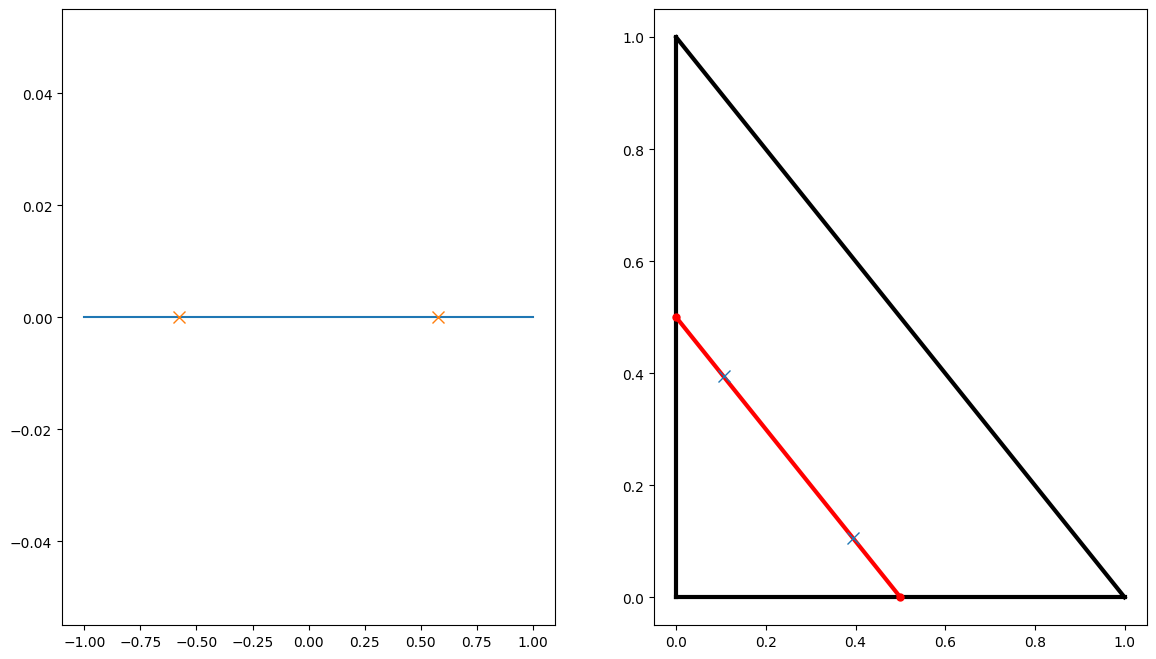

In [2]:
# MAP 1D GAUSS NODES TO 2D DOMAIN
XgintREF = np.zeros([Ngline,2])
for ig in range(Ngline):
    XgintREF[ig,:] = Nline[ig,:] @ XeintREF

#### PLOT
fig, axs = plt.subplots(1, 2, figsize=(14,8))

# PLOT 1D REFERENCE ELEMENT
axs[0].plot([-1,1],[0,0])
axs[0].plot(zline,np.zeros([Ngline]),'x', markersize = 8)

## PLOT 2D REFERENCE ELEMENT
for i in range(n):
    axs[1].plot([XeREF[int(TeREF[i])-1,0], XeREF[int(TeREF[int((i+1)%n)])-1,0]], 
            [XeREF[int(TeREF[i])-1,1], XeREF[int(TeREF[int((i+1)%n)])-1,1]], color='black', linewidth=3)

# PLOT INTERFACE LINEAR APPROXIMATION
axs[1].plot(XeintREF[:,0], XeintREF[:,1], '.', color='red',markersize=10)
axs[1].plot(XeintREF[:,0], XeintREF[:,1],color='red', linewidth=3)
# PLOT MAPPED GAUSS NODES
axs[1].plot(XgintREF[:,0],XgintREF[:,1],'x', markersize = 8)


In [3]:
# WHEN INTEGRATING THE IDENTITY FUNCTION OVER THE SEGMENT WE SHOULD OBTAIN THE LENGTH OF THE SEGMENT, WHICH IS EQUAL TO: 
print(np.linalg.norm(XeintREF[0,:]-XeintREF[1,:]))

0.7071067811865476


In [4]:
print("XgintREF", XgintREF)

print("dNdxiline", dNdxiline)

XgintREF [[0.10566243 0.39433757]
 [0.39433757 0.10566243]]
dNdxiline [[-0.5  0.5]
 [-0.5  0.5]]


In [5]:
# COMPUTE LINE INTEGRAL USING MODIFIED 1D QUADRATURE
def fun(z):
    return 1

integral = 0
# INTEGRATE IDENTITY FUNCTION
for ig in range(Ngline):
    # COMPUTE JACOBIAN OF TRANSFORMATION
    detJline = Jacobian1D(XeintREF[:,0],XeintREF[:,1],dNdxiline[ig,:])
    integral += fun(XgintREF[ig,:]) * np.abs(detJline) * wline[ig]

print(integral)

0.7071067811865476


In [6]:
# INTEGRATE SHAPE FUNCTION IN REFERENCE ELEMENT
# EVALUATE 2D REFERENCE SHAPE FUNCTION ON MODIFIED QUADRATURE GAUSS NODES
Nmod, dNdximod, dNdetamod = EvaluateShapeFunctions(ElType, ElOrder, n, XgintREF)

fekline = np.zeros([n]) 
for ig in range(Ngline):
    # COMPUTE JACOBIAN OF TRANSFORMATION
    detJline = Jacobian1D(XeintREF[:,0],XeintREF[:,1],dNdxiline[ig,:])
    # INTEGRATE EACH SHAPE FUNCTION SEPARATELY
    for i in range(n):   
        fekline[i] += Nmod[ig,i] * np.abs(detJline) * wline[ig]

print(fekline)

[0.1767767  0.1767767  0.35355339]


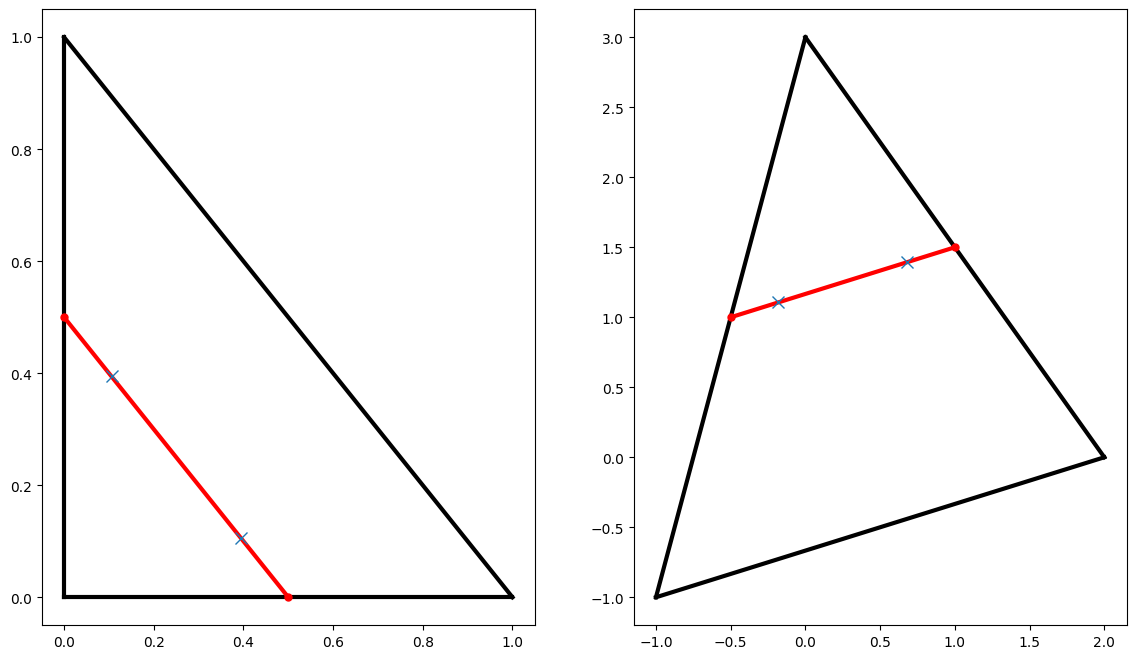

In [33]:
# DEFINE RANDOM ELEMENT
Xe = np.array([[-1, -1],[2,0],[0,3]])
#Xe = np.array([[-2, -0.5],[4,1],[0,3]])
#Xe = np.array([[0,0],[2,0],[0,2]])
Te = np.array([0,1,2])

# MAPP INTERFACE TO PHYSICAL ELEMENT
Xeint = np.zeros([len(XeintREF[:,0]),2])
Nint, foo, foo = EvaluateShapeFunctions(ElType, ElOrder, n, XeintREF)
for ig in range(len(XeintREF[:,0])):
    Xeint[ig,:] = Nint[ig,:] @ Xe
    
    
# MAPP GAUSS NODES TO PHYSICAL ELEMENT
Xgint = np.zeros([Ngline,2])
for ig in range(Ngline):
    Xgint[ig,:] = Nmod[ig,:] @ Xe

fig, axs = plt.subplots(1, 2, figsize=(14,8))
## PLOT 2D REFERENCE ELEMENT
for i in range(n):
    axs[0].plot([XeREF[int(TeREF[i])-1,0], XeREF[int(TeREF[int((i+1)%n)])-1,0]], 
            [XeREF[int(TeREF[i])-1,1], XeREF[int(TeREF[int((i+1)%n)])-1,1]], color='black', linewidth=3)

# PLOT INTERFACE LINEAR APPROXIMATION
axs[0].plot(XeintREF[:,0], XeintREF[:,1], '.', color='red',markersize=10)
axs[0].plot(XeintREF[:,0], XeintREF[:,1],color='red', linewidth=3)
# PLOT MAPPED GAUSS NODES
axs[0].plot(XgintREF[:,0],XgintREF[:,1],'x', markersize = 8)

# PLOT IN PHYSICAL SPACE
for i in range(n):
    axs[1].plot([Xe[int(Te[i])-1,0], Xe[int(Te[int((i+1)%n)])-1,0]], 
            [Xe[int(Te[i])-1,1], Xe[int(Te[int((i+1)%n)])-1,1]], color='black', linewidth=3)
      
# PLOT INTERFACE LINEAR APPROXIMATION
axs[1].plot(Xeint[:,0], Xeint[:,1], '.', color='red',markersize=10)
axs[1].plot(Xeint[:,0], Xeint[:,1],color='red', linewidth=3)
# PLOT MAPPED GAUSS POINTS
axs[1].plot(Xgint[:,0],Xgint[:,1],'x', markersize = 8)



In [29]:
# LENGTH OF INTERFACE ON PHYSICAL ELEMENT
print(np.linalg.norm(Xeint[0,:]-Xeint[1,:]))

1.5811388300841898


In [31]:
# COMPUTE LINE INTEGRAL USING MODIFIED 1D QUADRATURE
def fun(z):
    return 1

####### SUMMARY
### 1D REFERENCE ELEMENT:
#   zline: GAUSS NODAL COORDINATES IN 1D REFERENCE ELEMENT
#   wline: GAUSS WEIGHTS IN 1D REFERENCE ELEMENT
### 2D REFERENCE ELEMENT:
#   XeREF: NODAL COORDINATES OF 2D REFERENCE ELEMENT
#   XeintREF: NODAL COORDINATES OF INTERFACE IN 2D REFERENCE ELEMENT
#   XgintREF: GAUSS NODAL COORDINATES IN 2D REFERENCE ELEMENT
### 2D PHYSICAL ELEMENT:
#   Xe: NODAL COORDINATES OF 2D PHYSICAL ELEMENT 
#   Xeint: NODAL COORDINATES OF INTERFACE IN 2D PHYSICAL ELEMENT
#   Xgint: GAUSS NODAL COORDINATES IN 2D PHYSICAL ELEMENT

# EVALUATE 1D REFERENCE SHAPE FUNCTIONS ON 1D REFERENCE GAUS NODES
Nline, dNdxiline, foo = EvaluateShapeFunctions(2, nline-1, nline, zline)

integral = 0
# INTEGRATE IDENTITY FUNCTION
for ig in range(Ngline):
    # COMPUTE JACOBIAN OF TOTAL TRANSFORMATION
    detJline = Jacobian1D(Xeint[:,0],Xeint[:,1],dNdxiline[ig,:])
    # COMPUTE INTEGRAL
    integral += fun(Xgint[ig,:]) * np.abs(detJline) * wline[ig]

print(integral)

1.5811388300841898
